In [ ]:
#%%

### ch8. 风险测度 Risk Measures
# 8.1 风险价值 Value-at-Risk 计算
# 8.2 信用价值调整 Credit Value Adjustments

# 导入需要的包
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as scs

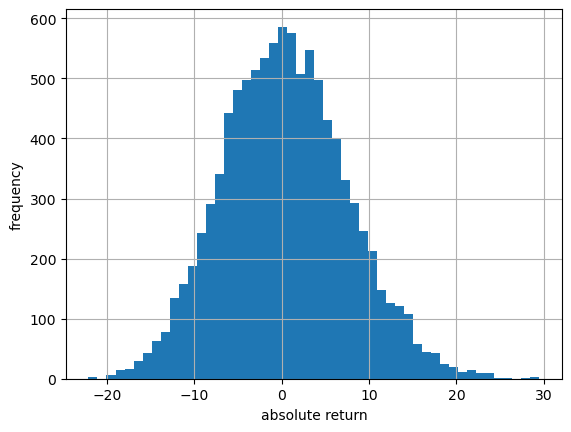

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.088
           99.90           18.644
           99.00           15.095
           97.50           12.858
           95.00           11.033
           90.00            8.590


In [ ]:
#%%

# 8.1 风险价值 Value-at-Risk 计算
################################

S0 = 100 # initial index level; 初始指数水平
r = 0.05 # constant short rate; 短期利率常数
sigma = 0.25 # constant volatility; 波动率常数
T = 30 / 365. # 30 days to maturity; 到期时间
I = 10000 # number of simulations; 模拟次数
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I)) # index values at maturity; 到期时的指数水平

R_gbm = np.sort(ST - S0) # absolute returns; 绝对收益

# 绘制直方图
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)
# tag: var_hist_gbm
# title: Absolute returns of geometric Brownian motion (30d); 几何布朗运动的绝对收益
plt.show()

# 计算不同百分比情况下的VaR
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

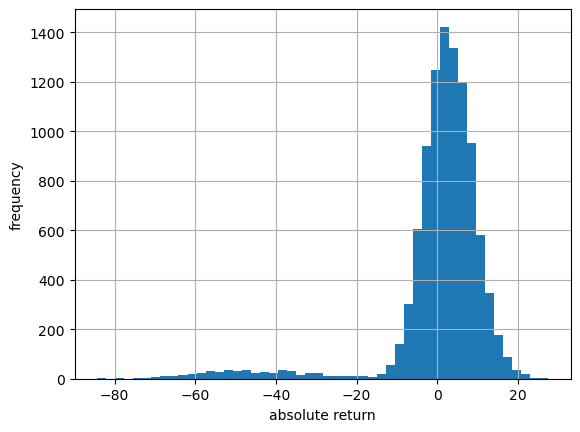

Confidence Level    Value-at-Risk
---------------------------------
           99.99           79.780
           99.90           69.951
           99.00           57.066
           97.50           46.595
           95.00           21.669
           90.00            6.295


In [ ]:
#%%

# Merton跳跃扩散 Jump-Diffusion

S0 = 100. # initial index level; 初始指数水平
r = 0.05  # constant short rate; 短期利率常数
sigma = 0.2  # constant volatility; 波动率常数
lamb = 0.75  # jump frequency per year; 跳跃频率
mu = -0.6    # expected jump size; 期望跳跃大小
delta = 0.25 # jump size standard deviation; 跳跃大小标准差
#T = 1.0
M = 50  # number of time intervals; 时间间隔数
I = 10000 # number of simulations; 模拟次数

#dt = T / M
dt = 30. / 365 / M  # 30 days to maturity; 到期时间
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)  # drift correction; 漂移校正
S = np.zeros((M + 1, I))  # index level matrix; 指数水平矩阵
S[0] = S0  # initial index level; 初始指数水平
sn1 = npr.standard_normal((M + 1, I))  # random numbers; 随机数
sn2 = npr.standard_normal((M + 1, I))  # random numbers; 随机数
poi = npr.poisson(lamb * dt, (M + 1, I)) # Poisson random numbers; 泊松随机数
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)  # absolute returns; 绝对收益

# 绘制直方图
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)
# tag: var_hist_jd
# title: Absolute returns of jump diffusion (30d); 跳跃扩散的绝对收益
plt.show()

percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]  # VaR percentiles; VaR百分位数
var = scs.scoreatpercentile(R_jd, percs) # Value-at-Risk; 风险价值
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

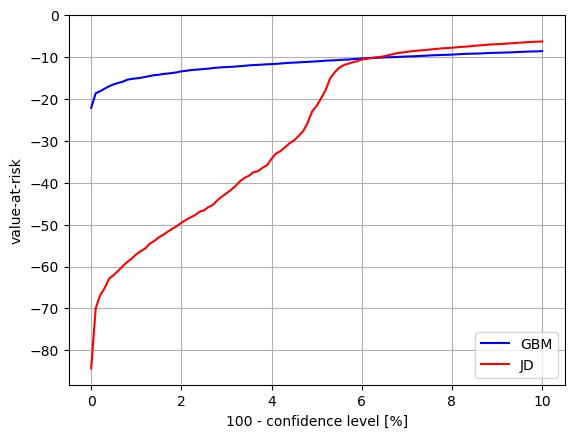

In [ ]:
#%%

# 两种情况的VaR测度的比较

percs = list(np.arange(0.0, 10.1, 0.1)) # confidence levels; 置信水平
gbm_var = scs.scoreatpercentile(R_gbm, percs) # Value-at-Risk for GBM; GBM的风险价值
jd_var = scs.scoreatpercentile(R_jd, percs)   # Value-at-Risk for JD; JD的风险价值

# 绘制比较图
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)
# tag: var_comp
# title: Value-at-risk for geometric Brownian motion and jump diffusion; 几何布朗运动和跳跃扩散的风险价值
plt.show()

未来指数水平的风险中立价值=资产当日现值:100.0036
信用风险价值CVaR:0.5061
经过信用风险调整之后的资产现值:99.4974
CVaR减去当前资产价值:99.4939
预期的由于信用风险引起的亏损次数:1008


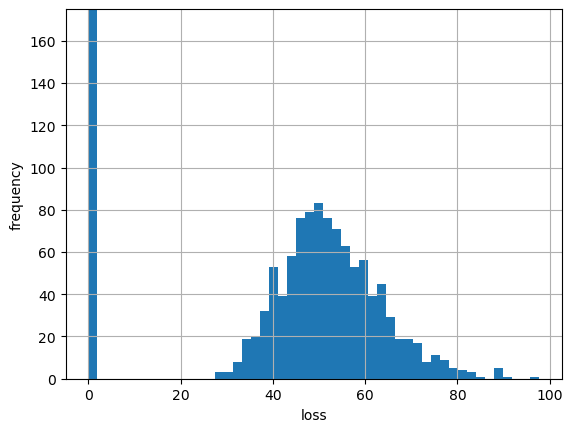

In [ ]:
#%%

# 8.2 信用价值调整 Credit Value Adjustments
##########################################
# CVaR, CVA 

S0 = 100.  # initial index level; 初始指数水平
r = 0.05   # constant short rate; 短期利率常数
sigma = 0.2  # constant volatility; 波动率常数
T = 1.   # 1 year to maturity; 到期时间
I = 100000  # number of simulations; 模拟次数
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))  # index values at maturity; 到期时的指数水平

L = 0.5  # loss level; 亏损水平
p = 0.01 # default probability; 违约概率

D = npr.poisson(p * T, I)  # number of defaults; 违约次数
D = np.where(D > 1, 1, D)  # 只有0和1两种情况

a=np.exp(-r * T) * 1 / I * np.sum(ST)  # risk-neutral present value; 风险中立现值
print("未来指数水平的风险中立价值=资产当日现值:%.4f" % (a))

CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST)  # conditional value at risk; 条件风险价值
print("信用风险价值CVaR:%.4f" % (CVaR))

S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)  # risk-adjusted present value; 风险调整现值
print("经过信用风险调整之后的资产现值:%.4f" % (S0_CVA))

S0_adj = S0 - CVaR  # adjusted asset value; 调整后的资产价值
print("CVaR减去当前资产价值:%.4f" % (S0_adj))

count=np.count_nonzero(L * D * ST)  # number of losses; 亏损次数
print("预期的由于信用风险引起的亏损次数:%d" % (count))

# 绘制直方图
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)
# tag: cva_hist_stock
# title: Losses due to risk-neutrally expected default (stock); 由于风险中立预期违约引起的亏损
plt.show()


考虑欧式看涨期权的情况
行权价为100时的价值:10.4323
信用风险价值CVaR:0.0541
调整后的期权价值C0_CVA:10.3782

 number of losses:570
 number of defaults:1008
 zero payoff:44066 



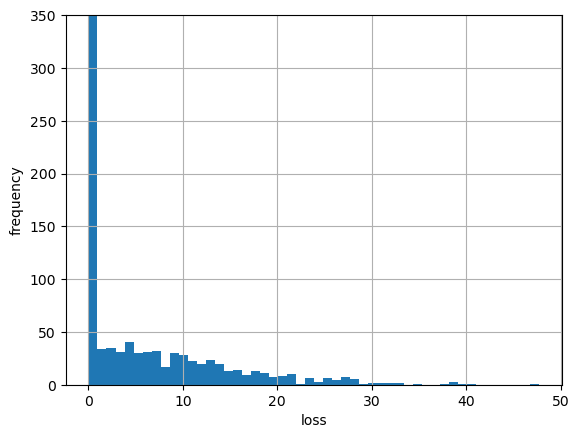

In [ ]:
#%%

# 考虑欧式看涨期权的情况
print("\n考虑欧式看涨期权的情况")
K = 100.  # strike price; 行权价
hT = np.maximum(ST - K, 0)  # inner values at maturity; 到期时的内在价值
C0 = np.exp(-r * T) * 1 / I * np.sum(hT) # risk-neutral present value; 风险中立现值
print("行权价为100时的价值:%.4f" % (C0))

CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT) # conditional value at risk; 条件风险价值
print("信用风险价值CVaR:%.4f" % (CVaR))

C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT) # risk-adjusted present value; 风险调整现值
C0_CVA
print("调整后的期权价值C0_CVA:%.4f" % (C0_CVA))

a1=np.count_nonzero(L * D * hT)  # number of losses; 亏损次数
a2=np.count_nonzero(D)  # number of defaults; 违约次数
a3=I - np.count_nonzero(hT)  # zero payoff; 零回报次数
print("\n number of losses:%d\n number of defaults:%d\n zero payoff:%d \n" % (a1,a2,a3))

plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)
# tag: cva_hist_opt
# title: Losses due to risk-neutrally expected default (call option); 由于风险中立预期违约引起的亏损
plt.show()

In [ ]:
#%%

#################END########################